In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures, OrdinalEncoder
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC, LinearSVC

from sklearn import metrics
from sklearn import tree
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

####dataset from: https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("taweilo/loan-approval-classification-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/loan-approval-classification-data


###Binary classification problem
target is the loan_status attribute (1 is approved 0 is rejected)

In [5]:
df = pd.read_csv("/kaggle/input/loan-approval-classification-data/loan_data.csv")
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [6]:
df.shape

(45000, 14)

#Preprocessing and Visualization


In [7]:
df.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [9]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [10]:
numerical = df.select_dtypes(include=['number']).columns.tolist()
numerical.remove('loan_status')
numerical

['person_age',
 'person_income',
 'person_emp_exp',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score']

In [11]:
categorical = df.select_dtypes(include=['object']).columns.tolist()
categorical.append('loan_status')
categorical

['person_gender',
 'person_education',
 'person_home_ownership',
 'loan_intent',
 'previous_loan_defaults_on_file',
 'loan_status']

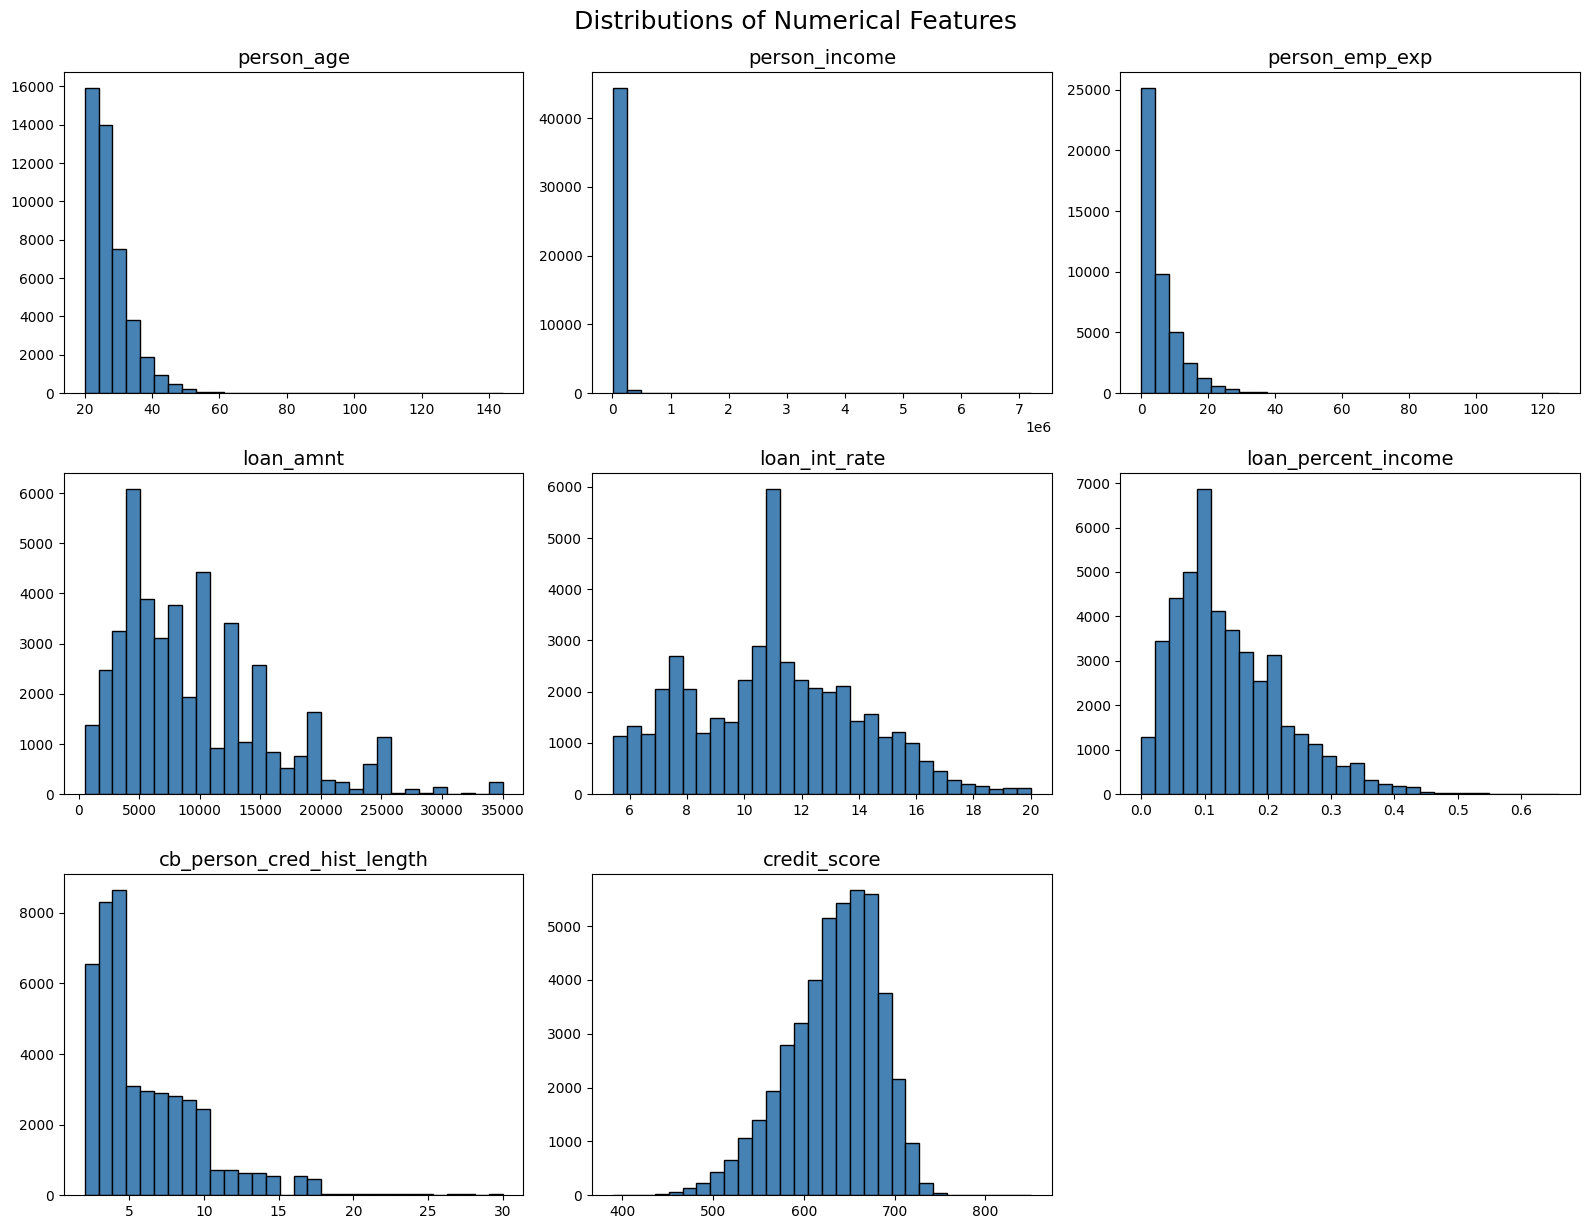

In [12]:
axes = df[numerical].hist(
    figsize=(16, 12),
    bins=30,
    color='steelblue',
    edgecolor='black',
    layout=(3, 3),
    grid=False
)

for ax in axes.ravel():
    ax.set_title(ax.get_title(), fontsize=14)
    ax.set_xlabel(ax.get_xlabel(), fontsize=12)

plt.tight_layout()
plt.suptitle("Distributions of Numerical Features", fontsize=18, y=1.02)
plt.show()

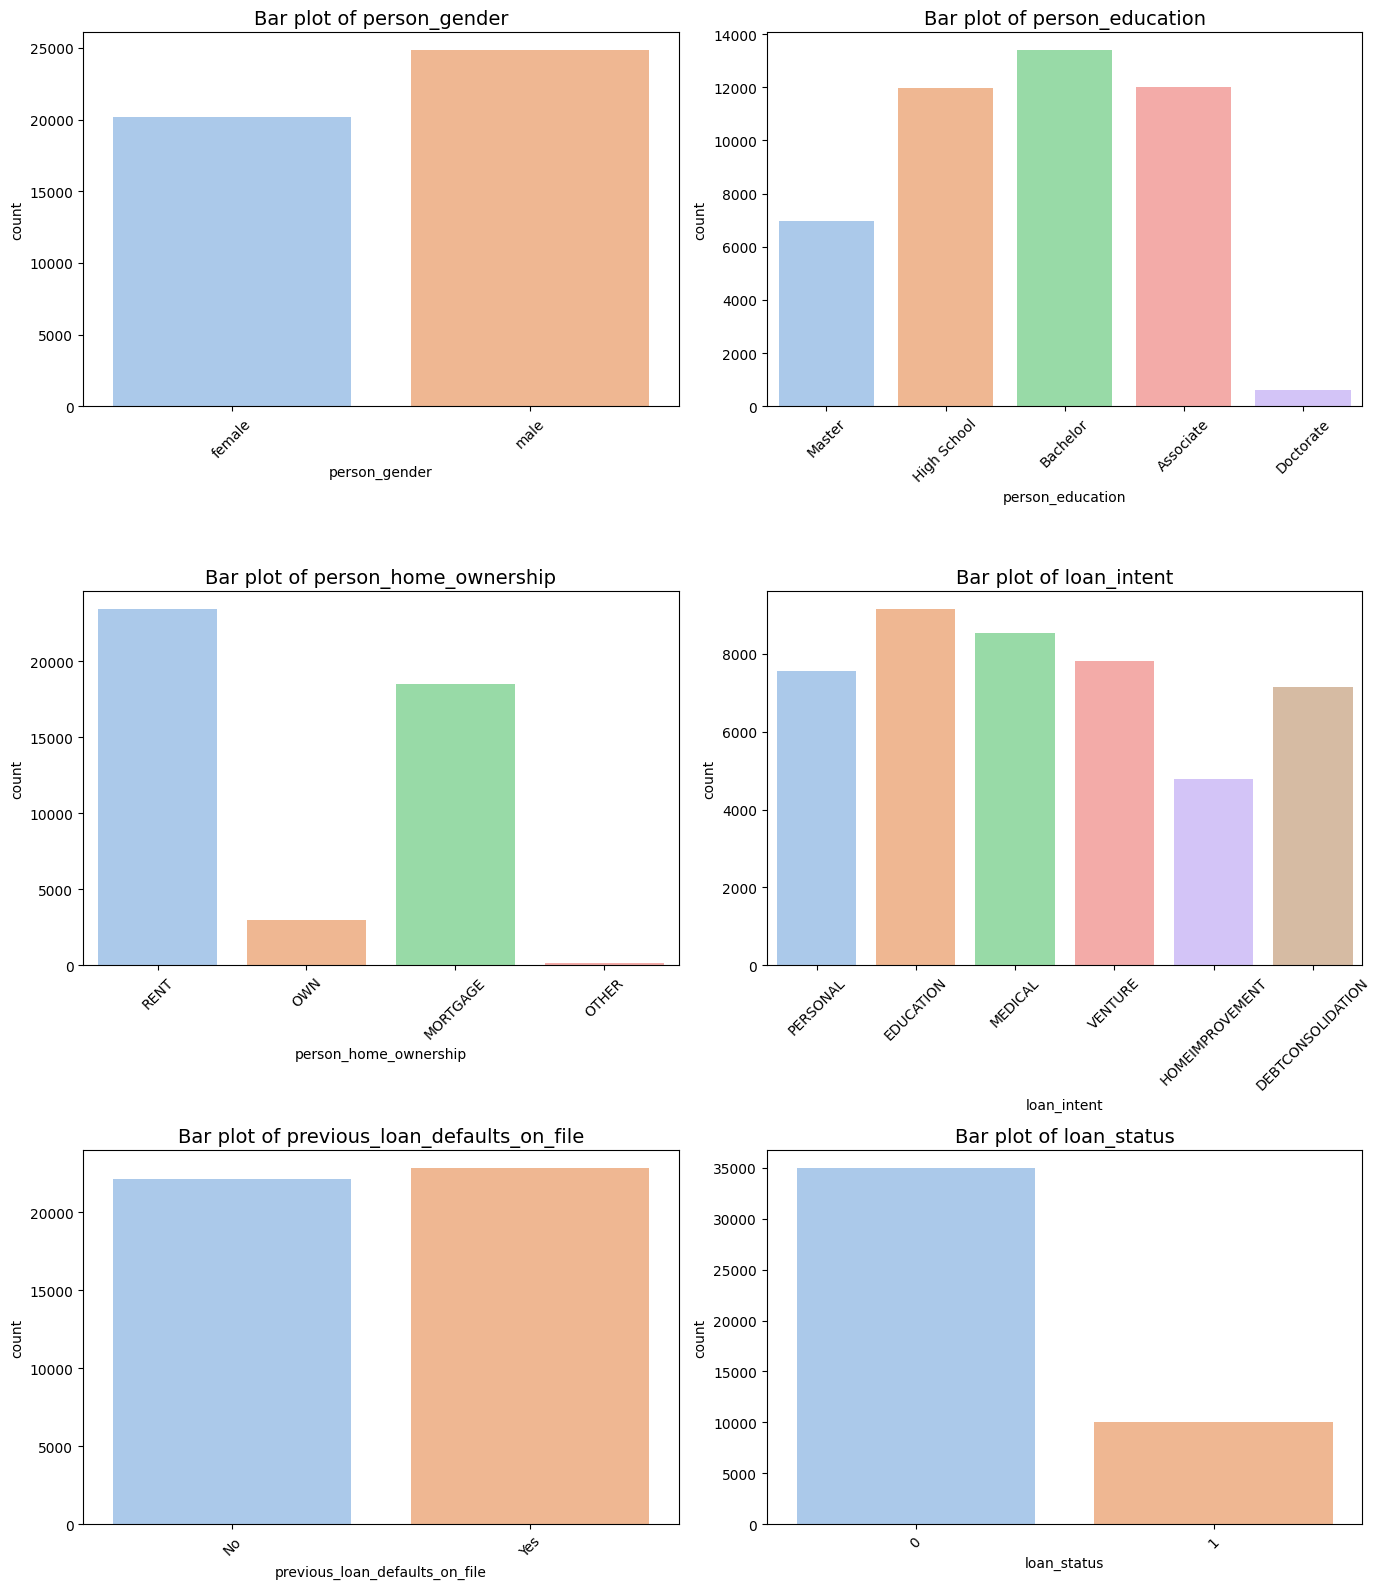

In [13]:
plt.figure(figsize=(14, 16))
for i, cat in enumerate(categorical):
    plt.subplot(3, 2, i + 1)
    sns.countplot(data=df, x=cat, hue=cat, palette="pastel", legend=False)
    plt.title(f'Bar plot of {cat}', fontsize=14)
    plt.xticks(rotation=45)
    plt.xlabel(cat)

plt.tight_layout()
plt.show()

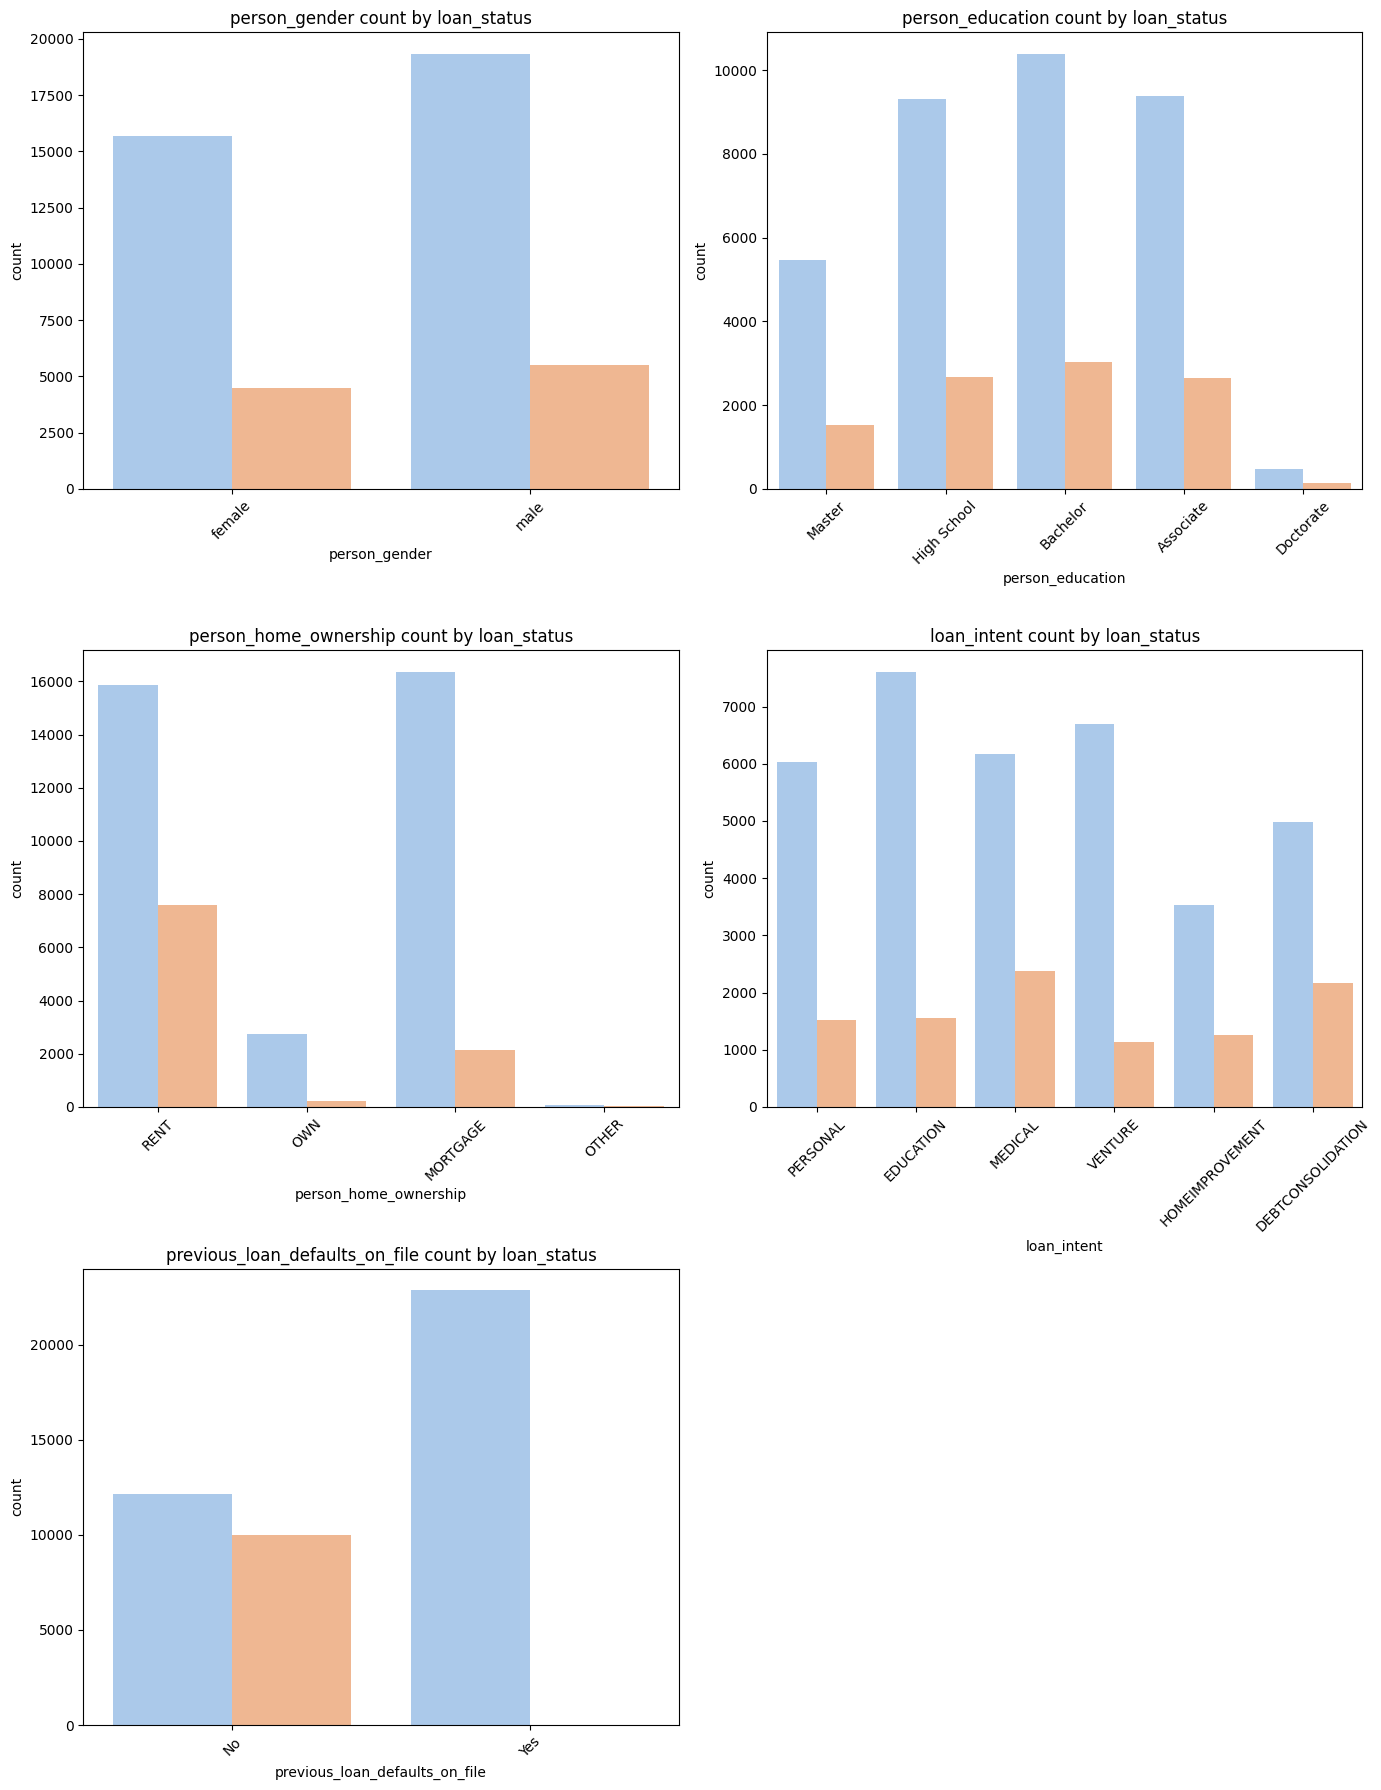

In [14]:
categorical.remove("loan_status")
plt.figure(figsize=(14, 18))
for i, col in enumerate(categorical):
    plt.subplot(3, 2, i + 1)
    sns.countplot(data=df, x=col, hue="loan_status", palette="pastel", legend=False)
    plt.title(f'{col} count by loan_status')
    plt.xlabel(col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

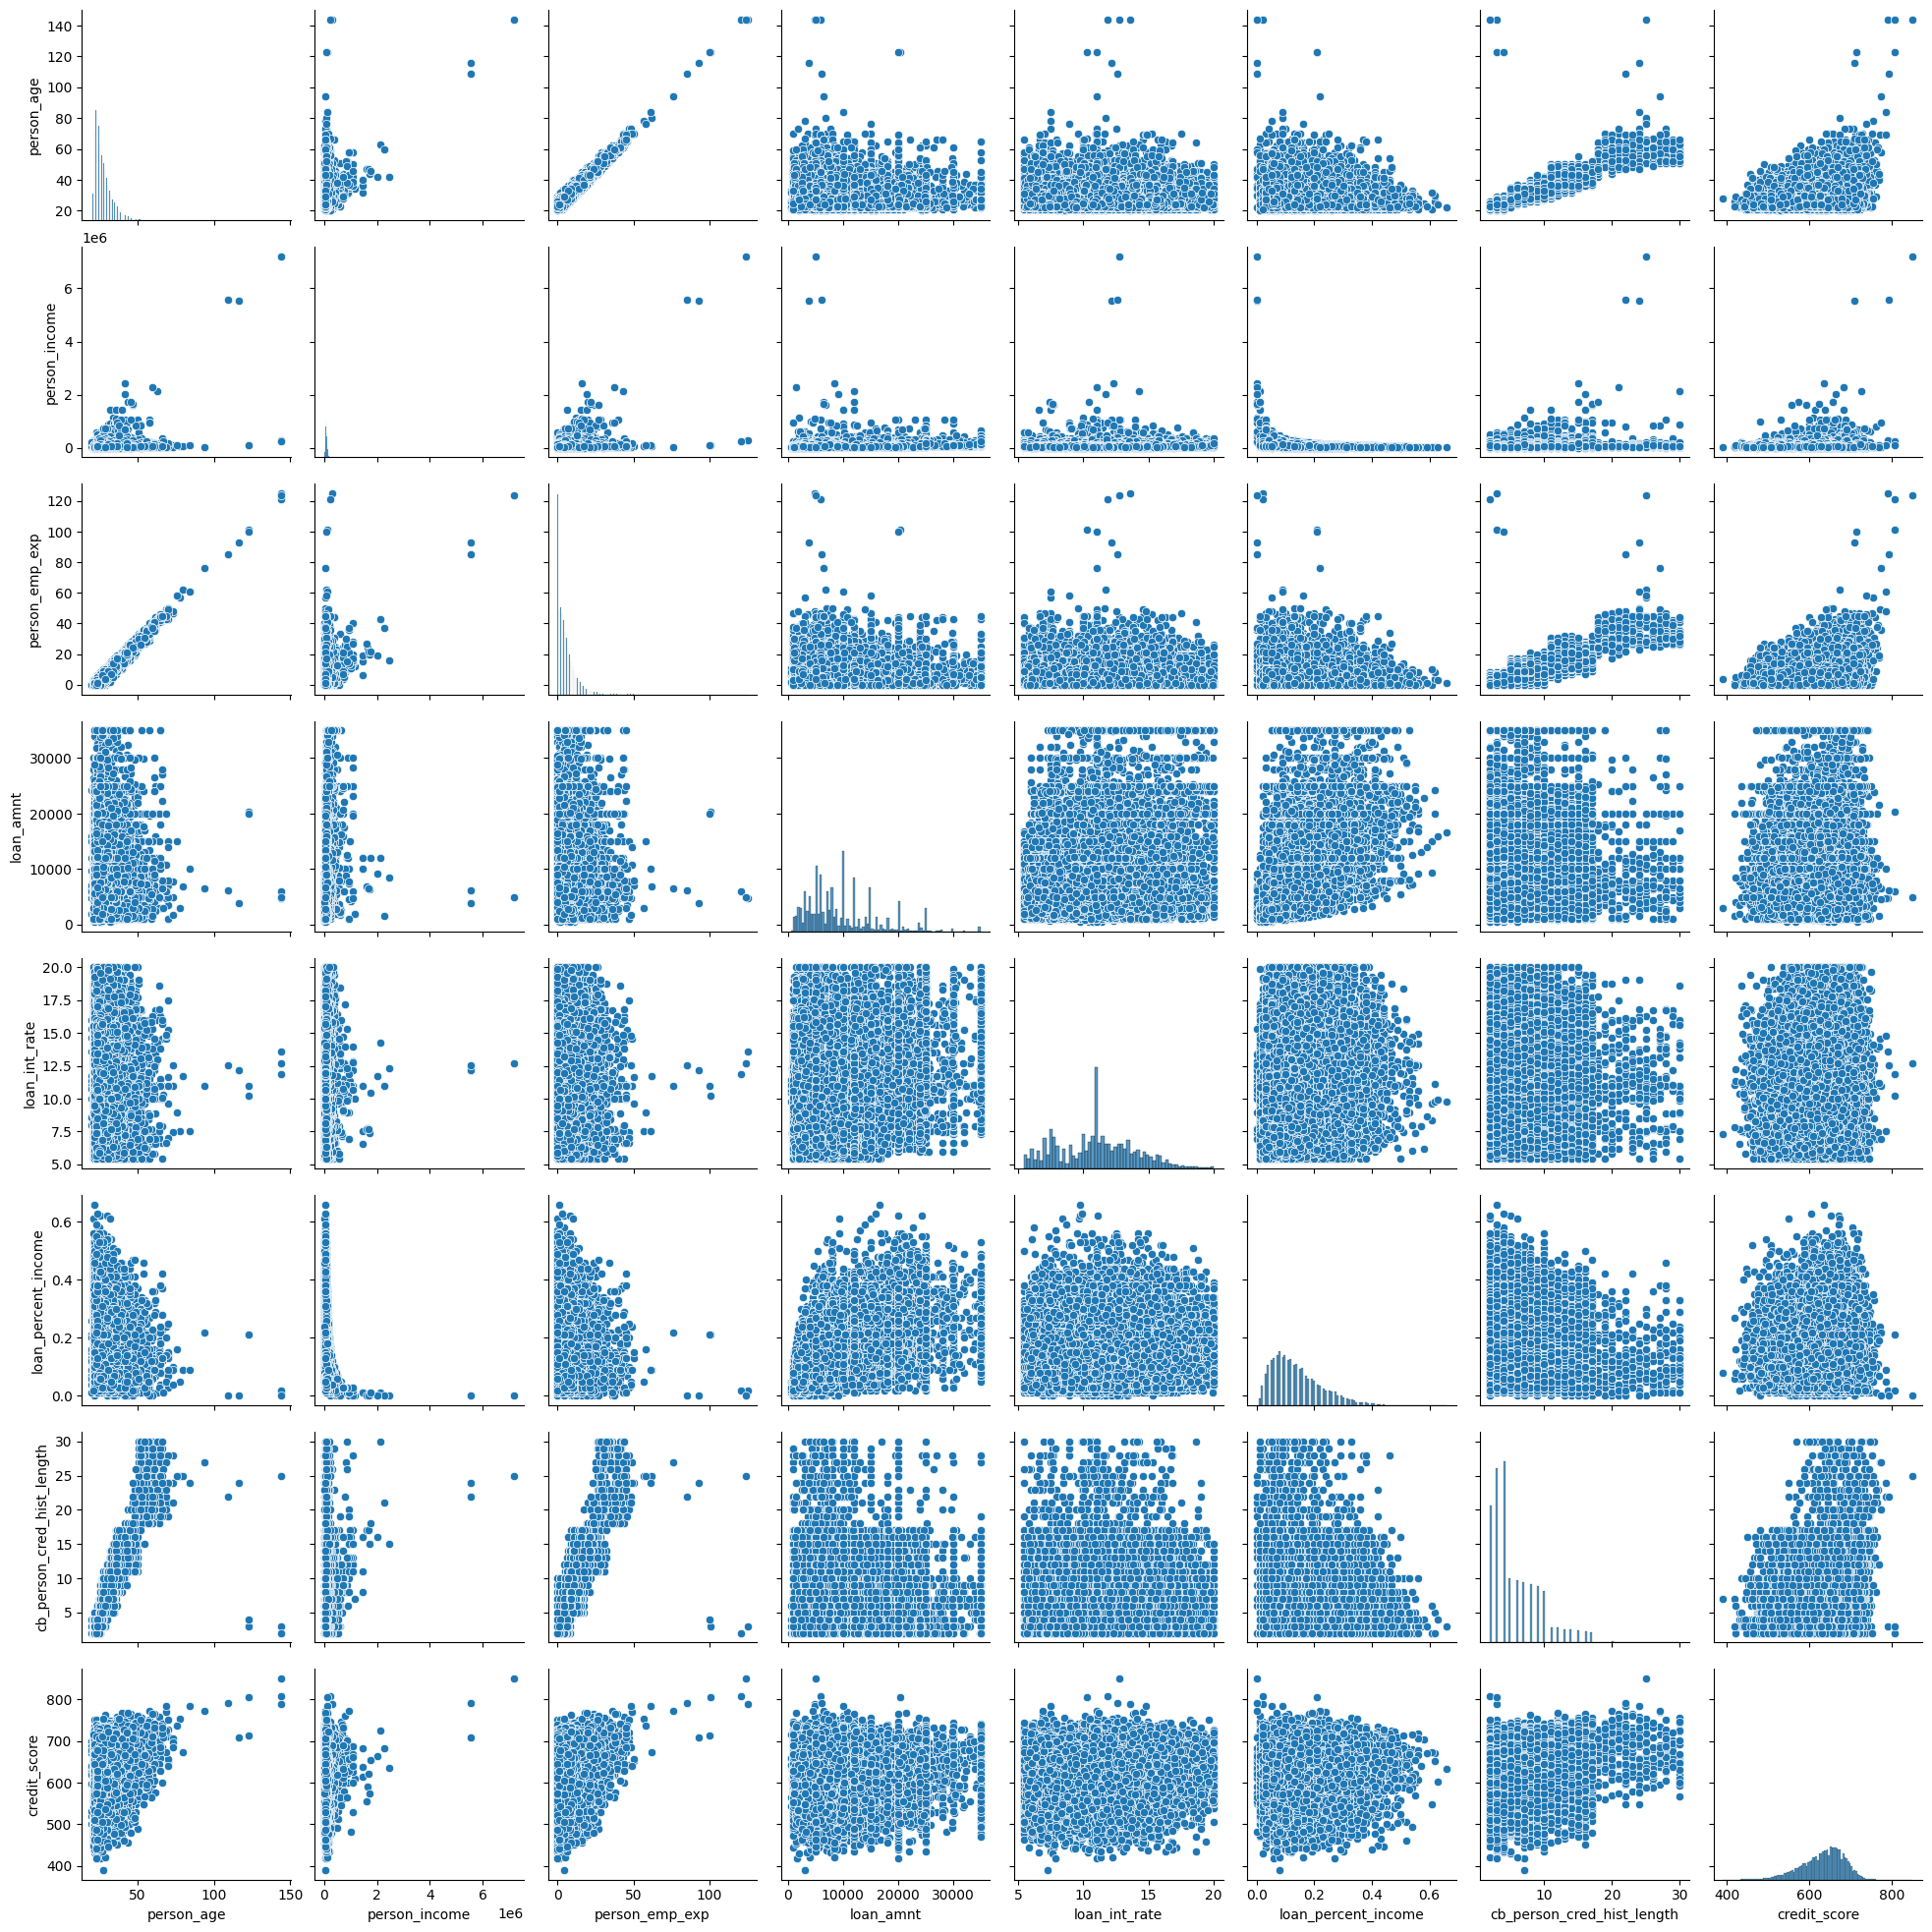

In [15]:
sns.pairplot(df[numerical])

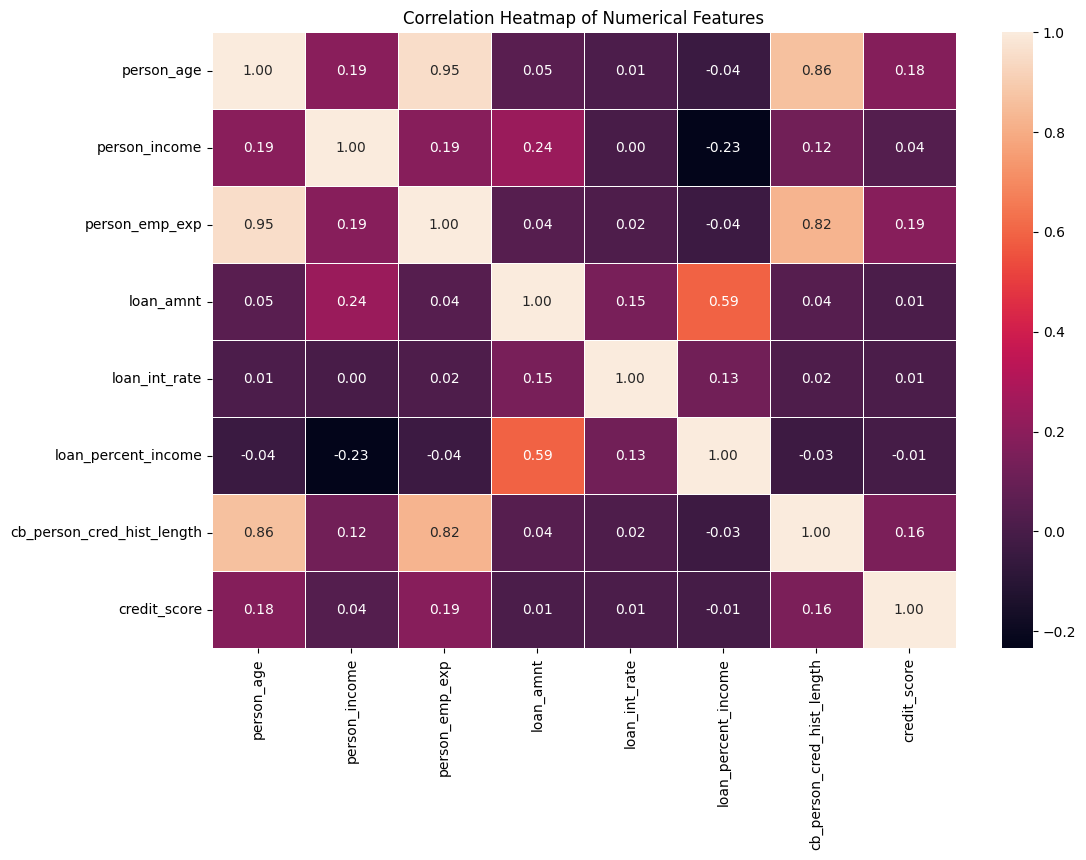

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical].corr(), annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

imame mng golema koreliranost na person_age i person_emp_exp (years of employment experience), i person_age so cb_person_cred_hist_length (length of credit history in years), kako i cb_person_cred_hist_length so person_emp_exp
➡ zatoa ke go ostavam samo cb_person_cred_hist_length

In [17]:
data = df.copy()
df.drop(columns=['person_age', 'person_emp_exp'], inplace=True)
df

,person_gender,person_education,person_income,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,female,Master,71948.0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,female,High School,12282.0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,female,High School,12438.0,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,female,Bachelor,79753.0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,male,Master,66135.0,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...
44995,male,Associate,47971.0,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,female,Associate,65800.0,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,male,Associate,56942.0,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,male,Bachelor,33164.0,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [18]:
categorical = df.select_dtypes(include=['object']).columns.tolist()
categorical

['person_gender',
 'person_education',
 'person_home_ownership',
 'loan_intent',
 'previous_loan_defaults_on_file']

In [19]:
for cat in categorical:
  print(df[cat].value_counts())
  print()

person_gender
male      24841
female    20159
Name: count, dtype: int64

person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64

person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64

loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64

previous_loan_defaults_on_file
Yes    22858
No     22142
Name: count, dtype: int64



In [20]:
le = LabelEncoder()
df['person_gender_encoded'] = le.fit_transform(df['person_gender'])
df['previous_loan_defaults_on_file_encoded'] = le.fit_transform(df['previous_loan_defaults_on_file'])
df['loan_intent_encoded'] = le.fit_transform(df['loan_intent'])

In [21]:
enc = OrdinalEncoder()
df['person_education_encoded'] = enc.fit_transform(df[['person_education']])
df['person_home_ownership_encoded'] = enc.fit_transform(df[['person_home_ownership']])

In [22]:
df

,person_gender,person_education,person_income,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,person_gender_encoded,previous_loan_defaults_on_file_encoded,loan_intent_encoded,person_education_encoded,person_home_ownership_encoded
0,female,Master,71948.0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1,0,0,4,4.0,3.0
1,female,High School,12282.0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0,0,1,1,3.0,2.0
2,female,High School,12438.0,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1,0,0,3,3.0,0.0
3,female,Bachelor,79753.0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1,0,0,3,1.0,3.0
4,male,Master,66135.0,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1,1,0,3,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,male,Associate,47971.0,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1,1,0,3,0.0,3.0
44996,female,Associate,65800.0,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1,0,0,2,0.0,3.0
44997,male,Associate,56942.0,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1,1,0,0,0.0,3.0
44998,male,Bachelor,33164.0,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1,1,0,1,1.0,3.0


In [23]:
categorical.append("loan_status")
categorical

['person_gender',
 'person_education',
 'person_home_ownership',
 'loan_intent',
 'previous_loan_defaults_on_file',
 'loan_status']

In [24]:
df["loan_status"].value_counts()

,count
loan_status,
0,35000
1,10000


In [25]:
X = df.drop(columns=categorical)
Y = df["loan_status"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [26]:
y_train.value_counts()

,count
loan_status,
0,28010
1,7990


oversampling using SMOTE - Synthetic Minority Over-sampling Technique

In [27]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)
y_train_bal.value_counts()

,count
loan_status,
0,28010
1,28010


#Feature Selection

In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

selector = SelectKBest(score_func=f_classif, k=8)
X_selected = selector.fit_transform(X_scaled, Y)

selected_features = X.columns[selector.get_support()]
print("Top selected features:\n", selected_features)

Top selected features:
 Index(['person_income', 'loan_amnt', 'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length', 'previous_loan_defaults_on_file_encoded',
       'loan_intent_encoded', 'person_home_ownership_encoded'],
      dtype='object')


#Clasification models:
###LDA, QDA & Naïve Bayes

Accuracy score:  0.82
Precision score: 0.56
Recall score:    0.95
F1 score:        0.71


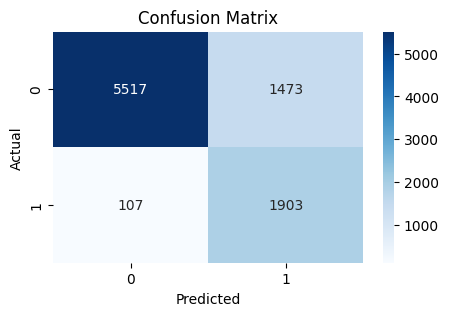


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.79      0.87      6990
           1       0.56      0.95      0.71      2010

    accuracy                           0.82      9000
   macro avg       0.77      0.87      0.79      9000
weighted avg       0.89      0.82      0.84      9000



In [29]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train_bal, y_train_bal)
y_pred = LDA.predict(X_test)

print(f'Accuracy score:  {accuracy_score(y_test, y_pred):.2f}')
print(f'Precision score: {precision_score(y_test, y_pred):.2f}')
print(f'Recall score:    {recall_score(y_test, y_pred):.2f}')
print(f'F1 score:        {f1_score(y_test, y_pred):.2f}')

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy score:  0.82
Precision score: 0.56
Recall score:    0.91
F1 score:        0.70


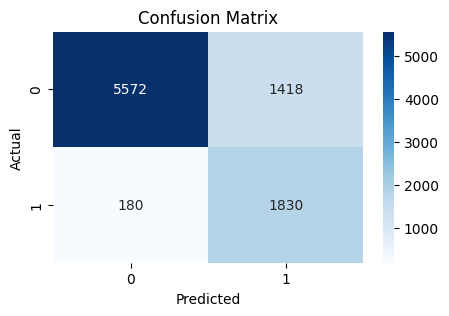


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.80      0.87      6990
           1       0.56      0.91      0.70      2010

    accuracy                           0.82      9000
   macro avg       0.77      0.85      0.79      9000
weighted avg       0.88      0.82      0.83      9000



In [30]:
QDA = QuadraticDiscriminantAnalysis(reg_param=0.1)
QDA.fit(X_train_bal, y_train_bal)
y_pred = QDA.predict(X_test)

print(f'Accuracy score:  {accuracy_score(y_test, y_pred):.2f}')
print(f'Precision score: {precision_score(y_test, y_pred):.2f}')
print(f'Recall score:    {recall_score(y_test, y_pred):.2f}')
print(f'F1 score:        {f1_score(y_test, y_pred):.2f}')

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy score:  0.52
Precision score: 0.30
Recall score:    0.89
F1 score:        0.45


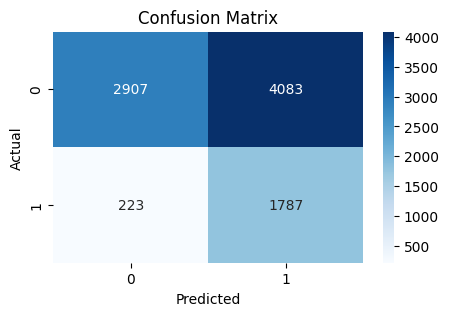


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.42      0.57      6990
           1       0.30      0.89      0.45      2010

    accuracy                           0.52      9000
   macro avg       0.62      0.65      0.51      9000
weighted avg       0.79      0.52      0.55      9000



In [31]:
GNB = GaussianNB()
GNB.fit(X_train_bal, y_train_bal)
y_pred = GNB.predict(X_test)

print(f'Accuracy score:  {accuracy_score(y_test, y_pred):.2f}')
print(f'Precision score: {precision_score(y_test, y_pred):.2f}')
print(f'Recall score:    {recall_score(y_test, y_pred):.2f}')
print(f'F1 score:        {f1_score(y_test, y_pred):.2f}')

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred))

###Logistic Regression

In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

using class_weight='balanced'

Accuracy score:  0.85
Precision score: 0.61
Recall score:    0.92
F1 score:        0.73


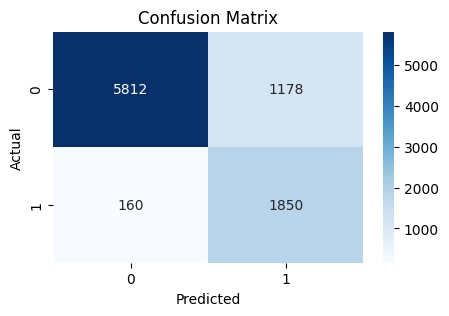


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.83      0.90      6990
           1       0.61      0.92      0.73      2010

    accuracy                           0.85      9000
   macro avg       0.79      0.88      0.82      9000
weighted avg       0.89      0.85      0.86      9000



In [33]:
logistic = LogisticRegression(class_weight='balanced', max_iter=100, solver='lbfgs')
logistic.fit(X_train_scaled, y_train)
y_pred = logistic.predict(X_test_scaled)

print(f'Accuracy score:  {accuracy_score(y_test, y_pred):.2f}')
print(f'Precision score: {precision_score(y_test, y_pred):.2f}')
print(f'Recall score:    {recall_score(y_test, y_pred):.2f}')
print(f'F1 score:        {f1_score(y_test, y_pred):.2f}')

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred))

using SMOTE balanced values

In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.fit_transform(X_test)

Accuracy score:  0.76
Precision score: 0.48
Recall score:    0.99
F1 score:        0.65


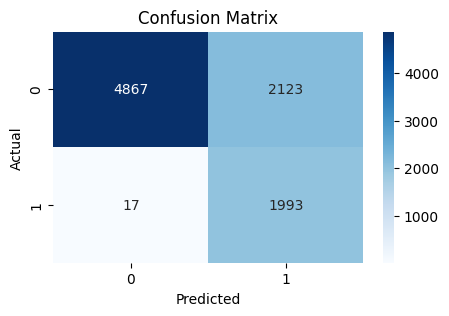


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82      6990
           1       0.48      0.99      0.65      2010

    accuracy                           0.76      9000
   macro avg       0.74      0.84      0.74      9000
weighted avg       0.88      0.76      0.78      9000



In [35]:
logistic = LogisticRegression(max_iter=100, solver='lbfgs')
logistic.fit(X_train_scaled, y_train_bal)
y_pred = logistic.predict(X_test_scaled)

print(f'Accuracy score:  {accuracy_score(y_test, y_pred):.2f}')
print(f'Precision score: {precision_score(y_test, y_pred):.2f}')
print(f'Recall score:    {recall_score(y_test, y_pred):.2f}')
print(f'F1 score:        {f1_score(y_test, y_pred):.2f}')

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred))

using regularization with balanced class weight

In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

Accuracy score:  0.85
Precision score: 0.61
Recall score:    0.92
F1 score:        0.73


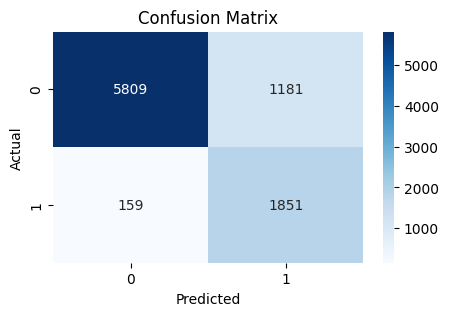


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.83      0.90      6990
           1       0.61      0.92      0.73      2010

    accuracy                           0.85      9000
   macro avg       0.79      0.88      0.82      9000
weighted avg       0.89      0.85      0.86      9000



In [38]:
lasso_logreg = LogisticRegression(class_weight="balanced", penalty='l1', solver='liblinear', C=1.0)
lasso_logreg.fit(X_train_scaled, y_train)
y_pred = lasso_logreg.predict(X_test_scaled)

print(f'Accuracy score:  {accuracy_score(y_test, y_pred):.2f}')
print(f'Precision score: {precision_score(y_test, y_pred):.2f}')
print(f'Recall score:    {recall_score(y_test, y_pred):.2f}')
print(f'F1 score:        {f1_score(y_test, y_pred):.2f}')

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy score:  0.85
Precision score: 0.61
Recall score:    0.92
F1 score:        0.73


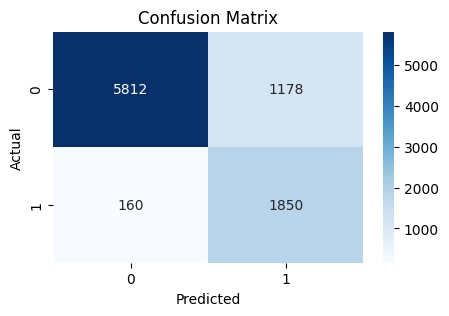


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.83      0.90      6990
           1       0.61      0.92      0.73      2010

    accuracy                           0.85      9000
   macro avg       0.79      0.88      0.82      9000
weighted avg       0.89      0.85      0.86      9000



In [39]:
ridge_logreg = LogisticRegression(class_weight="balanced", penalty='l2', solver='liblinear', C=1.0)
ridge_logreg.fit(X_train_scaled, y_train)
y_pred = ridge_logreg.predict(X_test_scaled)

print(f'Accuracy score:  {accuracy_score(y_test, y_pred):.2f}')
print(f'Precision score: {precision_score(y_test, y_pred):.2f}')
print(f'Recall score:    {recall_score(y_test, y_pred):.2f}')
print(f'F1 score:        {f1_score(y_test, y_pred):.2f}')

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy score:  0.85
Precision score: 0.61
Recall score:    0.92
F1 score:        0.73


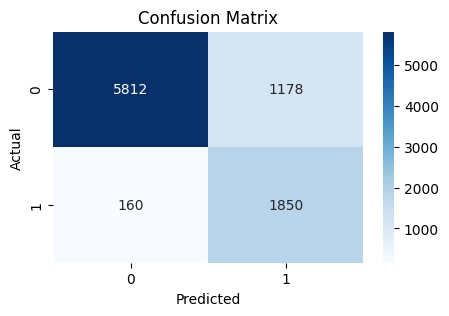


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.83      0.90      6990
           1       0.61      0.92      0.73      2010

    accuracy                           0.85      9000
   macro avg       0.79      0.88      0.82      9000
weighted avg       0.89      0.85      0.86      9000



In [42]:
elasticnet = LogisticRegression(class_weight="balanced", penalty='elasticnet', solver='saga', l1_ratio=0.5, C=1.0, max_iter=1000)
elasticnet.fit(X_train_scaled, y_train)
y_pred = elasticnet.predict(X_test_scaled)

print(f'Accuracy score:  {accuracy_score(y_test, y_pred):.2f}')
print(f'Precision score: {precision_score(y_test, y_pred):.2f}')
print(f'Recall score:    {recall_score(y_test, y_pred):.2f}')
print(f'F1 score:        {f1_score(y_test, y_pred):.2f}')

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred))

###Support Vector Machines – SVC

Accuracy score:  0.73
Precision score: 0.43
Recall score:    0.63
F1 score:        0.51


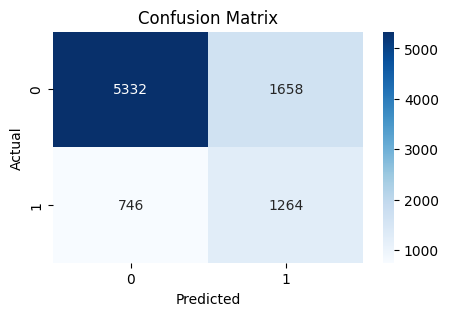


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.76      0.82      6990
           1       0.43      0.63      0.51      2010

    accuracy                           0.73      9000
   macro avg       0.65      0.70      0.66      9000
weighted avg       0.78      0.73      0.75      9000



In [43]:
# mn sporo podobro so linear
svc = SVC(class_weight='balanced')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print(f'Accuracy score:  {accuracy_score(y_test, y_pred):.2f}')
print(f'Precision score: {precision_score(y_test, y_pred):.2f}')
print(f'Recall score:    {recall_score(y_test, y_pred):.2f}')
print(f'F1 score:        {f1_score(y_test, y_pred):.2f}')

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred))

using class_weight='balanced' with LinearSVC

Accuracy score:  0.83
Precision score: 0.58
Recall score:    0.87
F1 score:        0.70


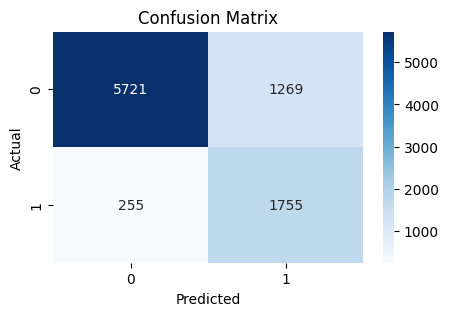


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.82      0.88      6990
           1       0.58      0.87      0.70      2010

    accuracy                           0.83      9000
   macro avg       0.77      0.85      0.79      9000
weighted avg       0.87      0.83      0.84      9000



In [44]:
svc = LinearSVC(class_weight='balanced')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print(f'Accuracy score:  {accuracy_score(y_test, y_pred):.2f}')
print(f'Precision score: {precision_score(y_test, y_pred):.2f}')
print(f'Recall score:    {recall_score(y_test, y_pred):.2f}')
print(f'F1 score:        {f1_score(y_test, y_pred):.2f}')

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred))

using SMOTE balanced values


Accuracy score:  0.74
Precision score: 0.45
Recall score:    0.76
F1 score:        0.56


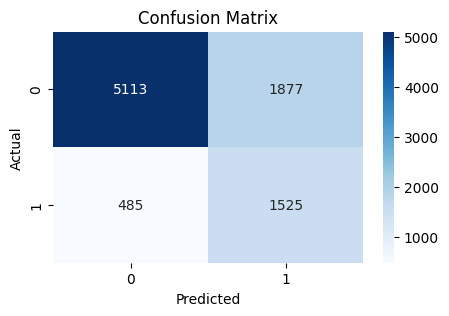


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.73      0.81      6990
           1       0.45      0.76      0.56      2010

    accuracy                           0.74      9000
   macro avg       0.68      0.75      0.69      9000
weighted avg       0.81      0.74      0.76      9000



In [45]:
svc = LinearSVC()
svc.fit(X_train_bal, y_train_bal)
y_pred = svc.predict(X_test)

print(f'Accuracy score:  {accuracy_score(y_test, y_pred):.2f}')
print(f'Precision score: {precision_score(y_test, y_pred):.2f}')
print(f'Recall score:    {recall_score(y_test, y_pred):.2f}')
print(f'F1 score:        {f1_score(y_test, y_pred):.2f}')

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred))

###KNN

Accuracy score:  0.77
Precision score: 0.49
Recall score:    0.71
F1 score:        0.58


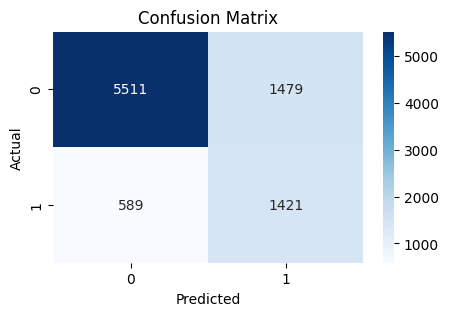


Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.79      0.84      6990
           1       0.49      0.71      0.58      2010

    accuracy                           0.77      9000
   macro avg       0.70      0.75      0.71      9000
weighted avg       0.81      0.77      0.78      9000



In [46]:
knn = KNeighborsClassifier()
knn.fit(X_train_bal, y_train_bal)
y_pred = knn.predict(X_test)

print(f'Accuracy score:  {accuracy_score(y_test, y_pred):.2f}')
print(f'Precision score: {precision_score(y_test, y_pred):.2f}')
print(f'Recall score:    {recall_score(y_test, y_pred):.2f}')
print(f'F1 score:        {f1_score(y_test, y_pred):.2f}')

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred))

###Classification trees

Decision Tree Classifier

Accuracy score:  0.90
Precision score: 0.76
Recall score:    0.80
F1 score:        0.78


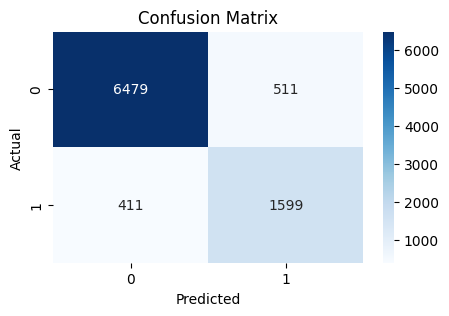


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93      6990
           1       0.76      0.80      0.78      2010

    accuracy                           0.90      9000
   macro avg       0.85      0.86      0.85      9000
weighted avg       0.90      0.90      0.90      9000



In [47]:
tree_cl = DecisionTreeClassifier(criterion='gini',max_depth=None,min_samples_split=25)
tree_cl.fit(X_train_bal, y_train_bal)
y_pred = tree_cl.predict(X_test)

print(f'Accuracy score:  {accuracy_score(y_test, y_pred):.2f}')
print(f'Precision score: {precision_score(y_test, y_pred):.2f}')
print(f'Recall score:    {recall_score(y_test, y_pred):.2f}')
print(f'F1 score:        {f1_score(y_test, y_pred):.2f}')

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Random Forest Classifier

using SMOTE balanced values

Accuracy score:  0.92
Precision score: 0.81
Recall score:    0.83
F1 score:        0.82


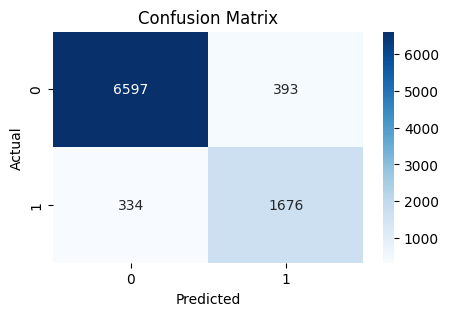


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95      6990
           1       0.81      0.83      0.82      2010

    accuracy                           0.92      9000
   macro avg       0.88      0.89      0.88      9000
weighted avg       0.92      0.92      0.92      9000



In [48]:
rf_cl = RandomForestClassifier()
rf_cl.fit(X_train_bal, y_train_bal)
y_pred = rf_cl.predict(X_test)

print(f'Accuracy score:  {accuracy_score(y_test, y_pred):.2f}')
print(f'Precision score: {precision_score(y_test, y_pred):.2f}')
print(f'Recall score:    {recall_score(y_test, y_pred):.2f}')
print(f'F1 score:        {f1_score(y_test, y_pred):.2f}')

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred))

using class_weight='balanced'

Accuracy score:  0.93
Precision score: 0.89
Recall score:    0.76
F1 score:        0.82


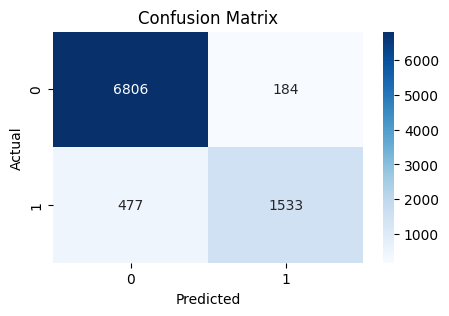


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      6990
           1       0.89      0.76      0.82      2010

    accuracy                           0.93      9000
   macro avg       0.91      0.87      0.89      9000
weighted avg       0.93      0.93      0.92      9000



In [49]:
rf_cl = RandomForestClassifier(class_weight='balanced')
rf_cl.fit(X_train, y_train)
y_pred = rf_cl.predict(X_test)

print(f'Accuracy score:  {accuracy_score(y_test, y_pred):.2f}')
print(f'Precision score: {precision_score(y_test, y_pred):.2f}')
print(f'Recall score:    {recall_score(y_test, y_pred):.2f}')
print(f'F1 score:        {f1_score(y_test, y_pred):.2f}')

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred))

###Neural Network

In [50]:
def build_model(input_dim, output_dim, hidden_layers, activation, learning_rate):
    model = Sequential()
    model.add(Dense(hidden_layers[0], activation=activation, input_dim=input_dim))
    model.add(Dropout(0.2))

    for units in hidden_layers[1:]:
        model.add(Dense(units, activation=activation))
        model.add(Dropout(0.2))

    model.add(Dense(output_dim, activation='sigmoid'))
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])

    return model

In [51]:
param_grid = [
    {'hidden_layers': [64, 32], 'activation': 'relu', 'learning_rate': 0.001},
]

In [52]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

Training with {'hidden_layers': [64, 32], 'activation': 'relu', 'learning_rate': 0.001}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,914 (11.38 KB)

 Trainable params: 2,914 (11.38 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/16
900/900 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8564 - loss: 0.3127 - val_accuracy: 0.8956 - val_loss: 0.2203
Epoch 2/16
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8965 - loss: 0.2292 - val_accuracy: 0.8999 - val_loss: 0.2122
Epoch 3/16
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8996 - loss: 0.2187 - val_accuracy: 0.9042 - val_loss: 0.2093
Epoch 4/16
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9020 - loss: 0.2168 - val_accuracy: 0.9051 - val_loss: 0.2061
Epoch 5/16
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8989 - loss: 0.2172 - val_accuracy: 0.9051 - val_loss: 0.2046
Epoch 6/16
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9079 - loss: 0.2059 - val_accuracy: 0.9071 - val_loss: 0.2005
Epoch 7/16
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9061 - loss: 0.2088 - val_accuracy: 0.9071 - val_loss: 0.1986
Epoch 8/16
900/900 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9072 - loss: 0.2028 - val_accurac

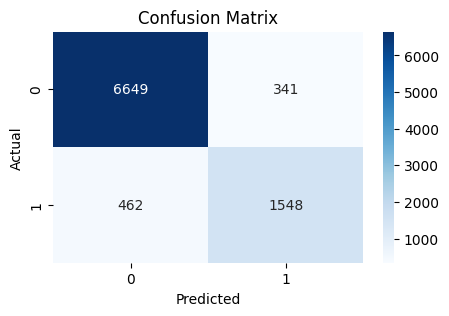


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94      6990
           1       0.82      0.77      0.79      2010

    accuracy                           0.91      9000
   macro avg       0.88      0.86      0.87      9000
weighted avg       0.91      0.91      0.91      9000



In [53]:
input_dim = X_train_scaled.shape[1]
output_dim = len(np.unique(df["loan_status"]))

for params in param_grid:
    print(f"Training with {params}")

    model = build_model(input_dim, output_dim,
                        hidden_layers=params['hidden_layers'],
                        activation=params['activation'],
                        learning_rate=params['learning_rate'])

    print(model.summary())

    model.fit(X_train_scaled, y_train, epochs=16, batch_size=32, validation_split=0.2)

    y_pred = np.argmax(model.predict(X_test_scaled), axis=1)
    #y_pred = model.predict(X_test_scaled).flatten()

print(f'Accuracy score:  {accuracy_score(y_test, y_pred):.2f}')
print(f'Precision score: {precision_score(y_test, y_pred):.2f}')
print(f'Recall score:    {recall_score(y_test, y_pred):.2f}')
print(f'F1 score:        {f1_score(y_test, y_pred):.2f}')

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred))